In [1]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import scipy.stats as st

In [6]:
file = "country_case_df.csv"


# Read df into pandas.
country_case_df = pd.read_csv(file)
country_case_df.head()

,Unnamed: 0,country,confirmed,deaths,population,sq_km_area,life_expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,0,Afghanistan,148572,6804,35530081,652090.0,45.9,NaN,Asia,AF,Southern and Central Asia,4.0,Kabul,0.418158,0.019150
1,1,Albania,133211,2457,2930187,28748.0,71.6,NaN,Europe,AL,Southern Europe,8.0,Tirana,4.546160,0.083851
2,2,Algeria,175229,4370,41318142,2381741.0,69.7,800,Africa,DZ,Northern Africa,12.0,Alger,0.424097,0.010576
3,3,Andorra,14766,128,76965,468.0,83.5,"1,996",Europe,AD,Southern Europe,20.0,Andorra la Vella,19.185344,0.166309
4,4,Angola,43070,1022,29784193,1246700.0,38.3,"1,112",Africa,AO,Central Africa,24.0,Luanda,0.144607,0.003431


In [7]:
happiness_2021_file = "WHR2021_Data.csv"

#Read df into pandas 
happiness_2021_df = pd.read_csv(happiness_2021_file)
happiness_2021_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [8]:
happiness_2020_file = "WHR2020_Data.csv"

#Read df into pandas 
happiness_2020_df = pd.read_csv(happiness_2020_file)
happiness_2020_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [11]:
country_case_df.rename(columns={"country":"Country name", "deaths":"Deaths", "life_expectancy":"Healthy life expectancy"}, inplace=True)

In [12]:
country_case_df.head()

,Unnamed: 0,Country name,confirmed,Deaths,population,sq_km_area,Healthy life expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,0,Afghanistan,148572,6804,35530081,652090.0,45.9,NaN,Asia,AF,Southern and Central Asia,4.0,Kabul,0.418158,0.019150
1,1,Albania,133211,2457,2930187,28748.0,71.6,NaN,Europe,AL,Southern Europe,8.0,Tirana,4.546160,0.083851
2,2,Algeria,175229,4370,41318142,2381741.0,69.7,800,Africa,DZ,Northern Africa,12.0,Alger,0.424097,0.010576
3,3,Andorra,14766,128,76965,468.0,83.5,"1,996",Europe,AD,Southern Europe,20.0,Andorra la Vella,19.185344,0.166309
4,4,Angola,43070,1022,29784193,1246700.0,38.3,"1,112",Africa,AO,Central Africa,24.0,Luanda,0.144607,0.003431


In [13]:
Happiness_merge_df = pd.merge(happiness_2021_df, happiness_2020_df, on="Country name", how="outer")
Happiness_merge_df.head()

,Country name,Regional indicator_x,Ladder score_x,Standard error of ladder score_x,upperwhisker_x,lowerwhisker_x,Logged GDP per capita_x,Social support_x,Healthy life expectancy_x,Freedom to make life choices_x,...,Generosity_y,Perceptions of corruption_y,Ladder score in Dystopia_y,Explained by: Log GDP per capita_y,Explained by: Social support_y,Explained by: Healthy life expectancy_y,Explained by: Freedom to make life choices_y,Explained by: Generosity_y,Explained by: Perceptions of corruption_y,Dystopia + residual_y
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.207612,0.364717,1.972317,1.338946,1.463646,0.975675,0.613626,0.336318,0.368570,2.352117


In [14]:
Together_merge_df = pd.merge(Happiness_merge_df, country_case_df, on="Country name", how="outer")
Together_merge_df.head()

,Country name,Regional indicator_x,Ladder score_x,Standard error of ladder score_x,upperwhisker_x,lowerwhisker_x,Logged GDP per capita_x,Social support_x,Healthy life expectancy_x,Freedom to make life choices_x,...,sq_km_area,Healthy life expectancy,elevation_in_meters,continent,abbreviation,location,iso,capital_city,percentage_confirmed_%,percentage_deaths_%
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,338145.0,77.4,164,Europe,FI,Nordic Countries,246.0,Helsinki [Helsingfors],1.961859,0.017816
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,43094.0,76.5,34,Europe,DK,Nordic Countries,208.0,Copenhagen,5.588369,0.044510
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,41284.0,79.6,"1,350",Europe,CH,Western Europe,756.0,Bern,8.503334,0.128669
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,103000.0,79.4,557,Europe,IS,Nordic Countries,352.0,Reykjav,2.457429,0.008955
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,41526.0,78.3,30,Europe,NL,Western Europe,528.0,Amsterdam,11.166165,0.106369


In [15]:
Together_merge_df.dtypes

Country name                                     object
Regional indicator_x                             object
Ladder score_x                                  float64
Standard error of ladder score_x                float64
upperwhisker_x                                  float64
lowerwhisker_x                                  float64
Logged GDP per capita_x                         float64
Social support_x                                float64
Healthy life expectancy_x                       float64
Freedom to make life choices_x                  float64
Generosity_x                                    float64
Perceptions of corruption_x                     float64
Ladder score in Dystopia_x                      float64
Explained by: Log GDP per capita_x              float64
Explained by: Social support_x                  float64
Explained by: Healthy life expectancy_x         float64
Explained by: Freedom to make life choices_x    float64
Explained by: Generosity_x                      

In [16]:
condensed_question_10_df = Together_merge_df.groupby(["Country name","Healthy life expectancy"]).sum()[["Deaths"]]
condensed_question_10_df.head()

,,Deaths
Country name,Healthy life expectancy,
Afghanistan,45.9,6804.0
Albania,71.6,2457.0
Algeria,69.7,4370.0
Andorra,83.5,128.0
Angola,38.3,1022.0


In [17]:
confirmed_deaths_to_expectancy_df = condensed_question_10_df.sort_values(by='Deaths', ascending = False)
confirmed_deaths_to_expectancy_df

,,Deaths
Country name,Healthy life expectancy,
US,77.1,614295.0
Brazil,62.9,558432.0
India,62.5,425195.0
Mexico,71.5,241936.0
Peru,70.0,196598.0
...,...,...
Samoa,69.2,0.0
Palau,68.6,0.0
Dominica,73.4,0.0


In [18]:
confirmed_deaths_to_expectancy_df['Natural log of Deaths'] = np.log(confirmed_deaths_to_expectancy_df['Deaths'])
confirmed_deaths_to_expectancy_df

/Users/Max/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,,Deaths,Natural log of Deaths
Country name,Healthy life expectancy,,
US,77.1,614295.0,13.328231
Brazil,62.9,558432.0,13.232888
India,62.5,425195.0,12.960303
Mexico,71.5,241936.0,12.396429
Peru,70.0,196598.0,12.188916
...,...,...,...
Samoa,69.2,0.0,-inf
Palau,68.6,0.0,-inf
Dominica,73.4,0.0,-inf


In [19]:
confirmed_deaths_to_expectancy_df.columns

Index(['Deaths', 'Natural log of Deaths'], dtype='object')

In [20]:
confirmed_deaths_to_expectancy_df.reset_index(inplace=True)

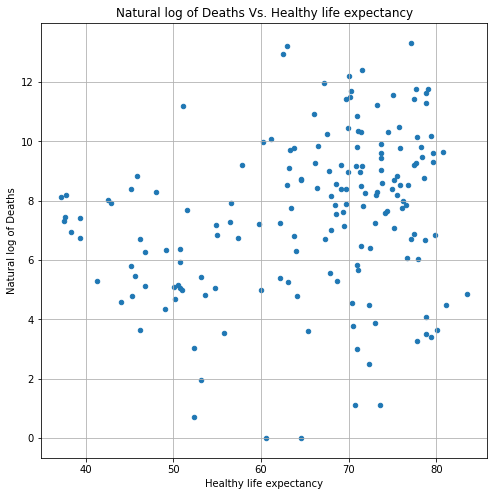

In [21]:
confirmed_deaths_to_expectancy_df.plot(kind="scatter", x="Healthy life expectancy", y="Natural log of Deaths", grid=True, figsize=(8,8), title="Natural log of Deaths Vs. Healthy life expectancy")
plt.show()

In [22]:
Together_merge_df.dropna(inplace=True)

The r-squared is: 0.19956381341257018


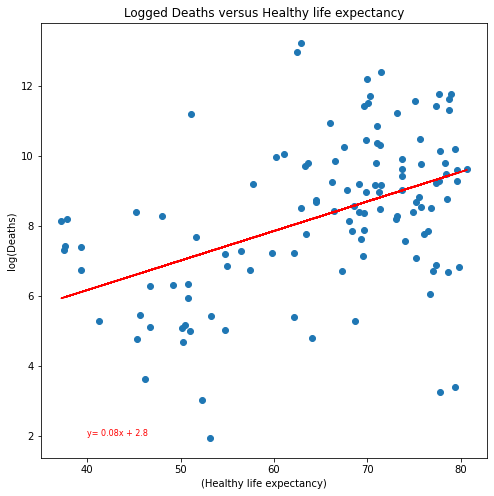

In [24]:
plt.rcParams['figure.figsize'] = [8, 8]
x_values = Together_merge_df['Healthy life expectancy']
y_values = np.log(Together_merge_df['Deaths'])
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq_1 = "y= " + str(round(slope,2)) + "x + "+ str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq_1,(40,2),fontsize =8, color='red')
plt.xlabel('(Healthy life expectancy)')
plt.ylabel('log(Deaths)')
plt.title('Logged Deaths versus Healthy life expectancy')
print(f'The r-squared is: {rvalue ** 2}')
plt.show()